In [1]:
from snobedo.input import SmrfTopo

In [2]:
# dem
# # /uufs/chpc.utah.edu/common/home/u1037042/Documents/isnobal_data
#
# d = "/uufs/chpc.utah.edu/common/home/skiles-group1/jmeyer/project-data/iSnobal/ERW/topo/basin_setup/topo.nc"
d = "/uufs/chpc.utah.edu/common/home/u1037042/Documents/isnobal_data/toponc_ERW/topo.nc"
xd2 = SmrfTopo(d)
xd2

In [3]:
from osgeo import gdal, osr

topo = gdal.Open(d, gdal.GA_ReadOnly)
topo
topo1 = gdal.Open(topo.GetSubDatasets()[0][0])
spatial_info = osr.SpatialReference()
spatial_info.SetFromUserInput(topo1.GetProjection())
print(spatial_info)

PROJCS["WGS84/UTMzone13N",
    GEOGCS["WGS84",
        DATUM["WGS_1984",
            SPHEROID["WGS84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-105],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32613"]]


In [4]:
topo.GetSubDatasets()[0][0]

'NETCDF:"/uufs/chpc.utah.edu/common/home/u1037042/Documents/isnobal_data/toponc_ERW/topo.nc":dem'

In [9]:
topo1.RasterCount

1

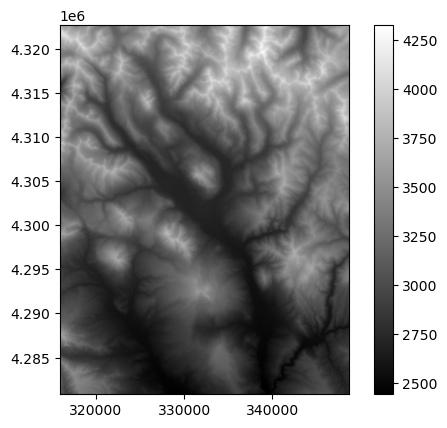

In [11]:
import matplotlib.pyplot as plt

# Read the data from the first band
band = topo1.GetRasterBand(1)
data = band.ReadAsArray()

# Get the geotransform information
geotransform = topo1.GetGeoTransform()

# Plot the data
plt.imshow(data, cmap='gray', extent=[geotransform[0], geotransform[0] + geotransform[1] * topo1.RasterXSize,
                                      geotransform[3] + geotransform[5] * topo1.RasterYSize, geotransform[3]])
plt.colorbar()
plt.show()

In [12]:
xd2.aspect

array([[-2.73652928, -2.79604171, -2.85587642, ..., -0.84490253,
        -0.63469711, -0.43706469],
       [-2.69165103, -2.73499419, -2.72629128, ..., -0.78058564,
        -0.59749334, -0.45362811],
       [-2.68693277, -2.70487365, -2.68697147, ..., -0.68087641,
        -0.54327488, -0.45717282],
       ...,
       [ 1.07246867,  1.34093627,  1.92621463, ..., -1.1921587 ,
        -1.13792451, -0.96171175],
       [ 2.17664733,  2.72095866,  3.04457777, ..., -0.94476781,
        -0.82847187, -0.74199255],
       [ 3.01085864, -3.10323223, -3.09550217, ..., -0.57111981,
        -0.67991387, -0.76024493]])

In [ ]:
# RERUN TOPOCALC 
# downscale a few scenes


In [ ]:
# is this shortwave simulation or cloudcover
# find day of clearsky
# find day with cloudcover
# splotchy detail may be cloud cover

In [12]:
# for HRRR
# Convert HRRR grib into numpy array (Gdal) - done
# warp HRRR again (for each)

# FOR Illumination - COS of incidence angle?
# run topo calc for day
# grab corresponding hour
# produce illumination intensity
# simple numpy HRRR * intensity

# Brent wilder - added self shading?
# COULD ADD new self shading - update topocalc
# look into 

In [13]:
from snobedo.shortwave import TopoShade
import numpy as np
from datetime import datetime
# topo shade for a day.py

In [14]:
def time_range_for(start, end):
    time_range = np.arange(
        start,
        end,
        np.timedelta64(1, 'h'),
        dtype='datetime64[s]'
    )
    return [datetime.fromisoformat(str(r)) for r in time_range]

In [15]:
topo_shade = TopoShade(
        "/uufs/chpc.utah.edu/common/home/u1037042/Documents/isnobal_data/toponc_ERW/topo.nc",
    "skyfield" 
    )
# "/uufs/chpc.utah.edu/common/home/skiles-group1/jmeyer/project-data/iSnobal/ERW/topo/basin_setup/topo.nc"
# eith er give path or file for topo.nc

In [16]:
# topo_shade.calculate(
#         time_range_for(arguments.start_date, arguments.end_date)
#     )
#

topo_shade.calculate(
        time_range_for("2022-04-01", "2022-04-02") # day 1 and next day
    )

# 

In [17]:
topo_shade.illumination_angles
# UTC time
# NEVER CALL SAVE

{datetime.datetime(2022, 4, 1, 6, 0, tzinfo=<UTC>): 0,
 datetime.datetime(2022, 4, 1, 7, 0, tzinfo=<UTC>): 0,
 datetime.datetime(2022, 4, 1, 8, 0, tzinfo=<UTC>): 0,
 datetime.datetime(2022, 4, 1, 9, 0, tzinfo=<UTC>): 0,
 datetime.datetime(2022, 4, 1, 10, 0, tzinfo=<UTC>): 0,
 datetime.datetime(2022, 4, 1, 11, 0, tzinfo=<UTC>): 0,
 datetime.datetime(2022, 4, 1, 12, 0, tzinfo=<UTC>): 0,
 datetime.datetime(2022, 4, 1, 13, 0, tzinfo=<UTC>): array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.03940631],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.02582573],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.00664614],
        ...,
        [0.4602099 , 0.41036789, 0.29333559, ..., 0.        , 0.        ,
         0.        ],
        [0.34079223, 0.25481624, 0.15060628, ..., 0.        , 0.        ,
         0.        ],
        [0.15932026, 0.08457125, 0.07423321, ..., 0.        , 0.   

In [ ]:
# select times 
# load corresponding grib

In [ ]:
# read in original HRRR data
hrrr_2022_base = '/uufs/chpc.utah.edu/common/home/skiles-group1/erw_isnobal/wy2022/erw_hrrr_solar/'


# HRRR_solar_0 = xr.open_mfdataset(
#     f'{SHARED_STORE}/erw_isnobal/{water_year}/erw_hrrr_solar/run*/net_solar.nc',
#     parallel=True, chunks={'time': 24}, # 'y' :10, 'x': 10},
#     drop_variables=['DSWRF', 'illumination_angle', 'zenith', 'azimuth', 'albedo_vis', 'albedo_ir'],
# )

HRRR_solar_0 = xr.open_mfdataset(
    f'{SHARED_STORE}/erw_isnobal/2022/erw_hrrr_solar/run2022/net_solar.nc',
    parallel=True, chunks={'time': 24}, # 'y' :10, 'x': 10},
    drop_variables=['DSWRF', 'illumination_angle', 'zenith', 'azimuth', 'albedo_vis', 'albedo_ir'],
)

In [ ]:
xx = xr.open_dataset('/uufs/chpc.utah.edu/common/home/skiles-group1/HRRR_water_years/2022/hrrr.20220401/hrrr.t14z.wrfsfcf06.grib2', 
    filter_by_keys={ 'level': 0, 'stepType': 'instant', 'cfVarName': 'dswrf', 'typeOfLevel': 'surface'}, 
    engine="cfgrib")

In [ ]:
# ^^^^ Don't use Xarray - need to use gdal for warping